# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

Импортируем необходимые библиотеки `pandas`, `seaborn` и `matplotlib.pyplot`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

import sys
!{sys.executable} -m pip install missingno


import missingno as msno

Используем разделитель `\t` для считывания файла.

In [2]:
# считываем файл
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

data.to_csv('real_estate_data.csv')

Выведем первые 20 строчек датафрейма на экран.

In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем основную информацию о датафрейме.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

# **Описание данных:**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Построим общую гистограмму для всех числовых столбцов таблицы.

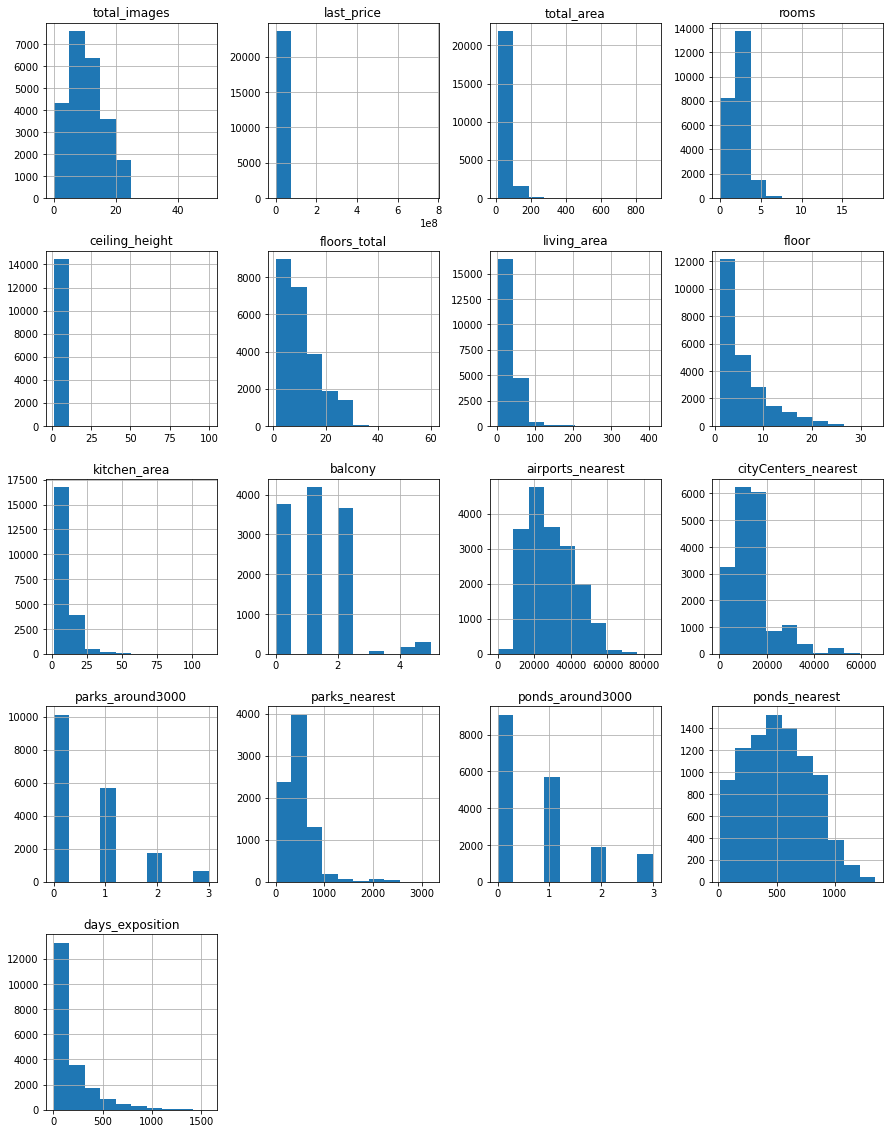

In [5]:
data.hist(figsize=(15, 20))
plt.title('Матрица гистограмм')
plt.show()

**Вывод:** В предоставленных нам данных, мы имеем имеем дело с данными разного типа. Из графиков можем понять, что распределение числовых полей не походит на нормальное. Длинные хвосты на графиках говорят, что будем иметь дело с большим количеством выбросов.

### Предобработка данных

#### Стиль заоголовков

Выведем на экран количество столбцов.

In [6]:
# названия столбцов таблицы data
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Только одно название столбца не соответсвует хорошему стилю - `cityCenters_nearest`. Изменим его.

In [7]:
# переименование столбца
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

Проверим результат.

In [8]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Удаление пропусков

Выведем количество пропущенных значений для каждого столбца, построив гистограмму с помощью библиотеки `missingno`. С её помощью сможем увидеть соотношение пропущенных значений ко всем значениям в столбце.

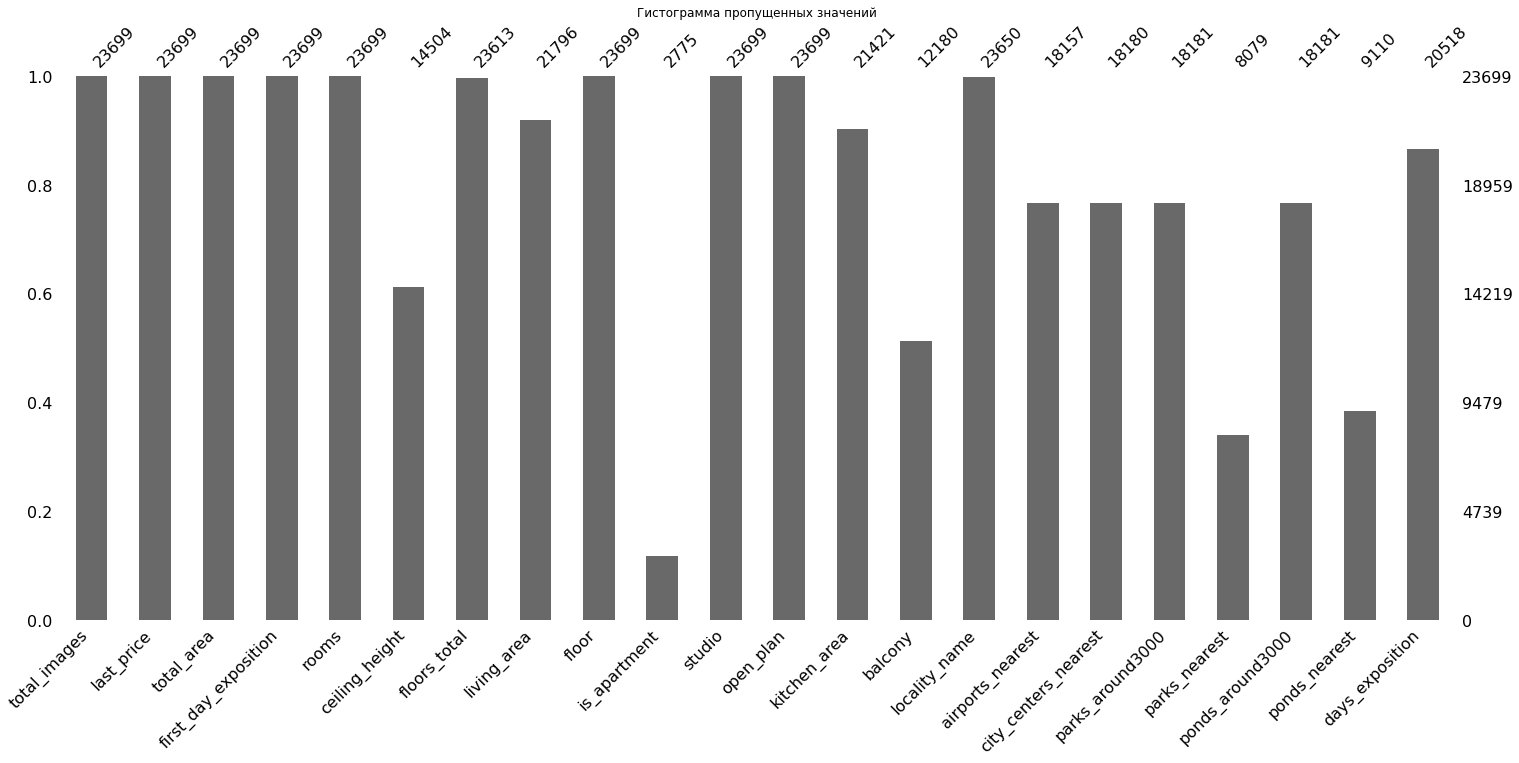

In [9]:
msno.bar(data)
plt.title('Гистограмма пропущенных значений')
plt.show()

Пропущенные значения имеются в следующих столбцах:

**ceiling_height (высота потолков) - 9195.** Данный параметр пользователи могут не заполнять сами, т.к. могут считать этот параметр не определяющим, либо забыть про него. Если квартира имеет высоту потолков сильно отличающуюся от стандартных, то вероятнее всего продаец это укажет. Так же можно направить запрос в команду разработки веб-формы, чтобы проверили форму на предмет ошибок. 

Высота потолка в любом случае не может быть ниже опреденного комфортного уровня, и она не зависит ни от площади квартиры, ни от количества комнат, ни от других имеющихся параметров. Логическую замену предложить невозможно, поэтому оставим как `NaN`.

**floors_total (количество этажей) - 86.** Вероятнее всего пользователи сами пропускают этот пункт. Проверим какие значения этажей находятся в пропусках с этими данными.

In [10]:
data[data['floors_total'].isna()]['floor'].value_counts()

4     10
6      9
8      8
12     6
9      5
3      4
5      4
7      4
21     4
15     3
19     3
18     3
1      3
13     3
11     3
10     3
14     2
2      2
20     2
24     2
17     1
22     1
23     1
Name: floor, dtype: int64

Как видим диапазон этажей в таких объявлениях широкий, и мы заведомо не можем предположить сколько их может может быть в доме. Пропусков в данном поле очень мало и дальше при добавлении столбца "тип этажа квартиры" они могут помешать нам. Удалим их.

In [11]:
data = data.dropna(subset=['floors_total'])

**living_area (жилая площадь) - 1903.** Этот параметр пользователи могут не заполнять, т.к. скорее всего они заполняют общую площадь помещения. Это важный параметр и пропусков много, логической замены предложить не можем, поэтому оставим как `NaN`.

**is_apartment (аппартаменты) - 20924.** Посмотрим какие значения этот столбец принимает.

In [12]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Вероятнее всего люди не указывают этот параметр, так как подразумевается, что продающаяся квартира не является аппартаментами. Заполним пропуски значением `False`

In [13]:
data['is_apartment'] = data['is_apartment'].fillna(False)

**kitchen_area (площадь кухни) - 2278.** Ситуация аналогична жилой площади. Оставим `NaN`.

**balcony (кол-во балконов) - 11519.** Пропущенные значения, скорее всего, означают, что балконов в квартире нет. Заменим эти значения на 0.

In [14]:
data['balcony'] = data['balcony'].fillna(0)

**locality_name (название населенного пункта) - 49.** Вероятнее всего пользователи сами пропускают этот пункт. Мы не можем подставить сюда значения на основании других столбцов, и т.к. этих пропусков очень мало - удалим их.

In [15]:
data = data.dropna(subset=['locality_name'])

Рассмотрим следующие столбцы **`airports_nearest`, `city_centers_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`**. Это картографические данные о недвижимости. Эти пропуски, вероятнее всего, вызваны тем, что пользователи либо забывают указывать эту информацию, либо не знают её.
Рассмотрим эти пропуски поближе, построив визуализацию этих пропусков с помощью библиотеки `missingno`.

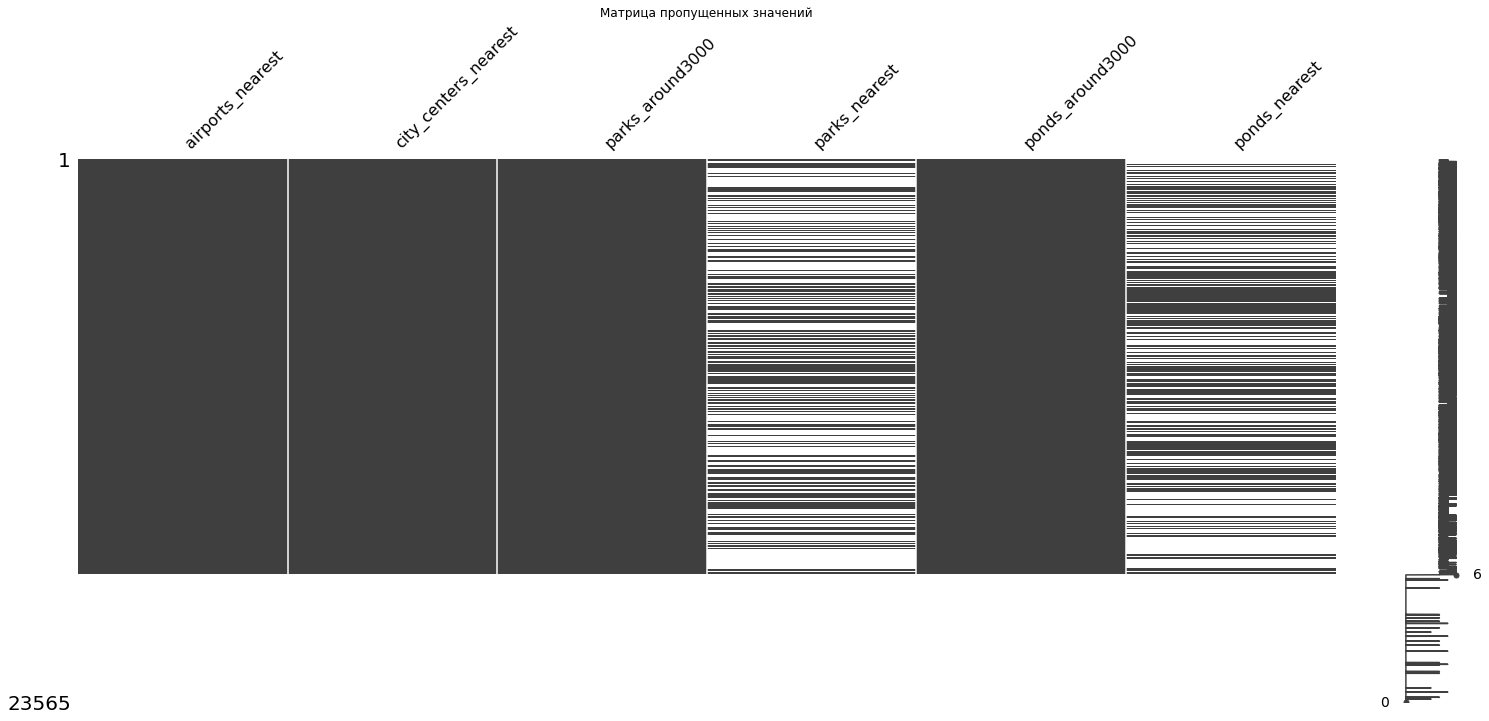

In [16]:
msno.matrix(data[['airports_nearest', 'city_centers_nearest', 'parks_around3000',
                  'parks_nearest', 'ponds_around3000', 'ponds_nearest']].sort_values('airports_nearest'))
plt.title('Матрица пропущенных значений')
plt.show()

Начнем с `airports_nearest`, `city_centers_nearest`, `parks_around3000`, `ponds_around3000`. Количество пропусков этих столбцов примерно одинаковое, и они находятся преимущественно в одинаковых строках. Это подтверждает гипотезу о том, что пользователи полностью не заполняют этот блок информации. Проверим с чем это может быть связано и рассмотрим населенные пункты в этих пропусках на примере `airports_nearest`.

In [17]:
# названия населенных пунктов из объявлений не содержащих расстояние до аэропорта
data.loc[data['airports_nearest'].isna(), 'locality_name'].value_counts().head(20)

посёлок Мурино             520
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    171
деревня Новое Девяткино    143
Сертолово                  142
Кириши                     125
Сланцы                     112
Волхов                     111
Кингисепп                  104
Тосно                      104
Никольское                  93
Коммунар                    89
Сосновый Бор                87
Кировск                     84
Санкт-Петербург             84
Отрадное                    80
посёлок Бугры               68
Name: locality_name, dtype: int64

In [18]:
# названия населенных пунктов из объявлений содержащих расстояние до аэропорта
data.loc[~data['airports_nearest'].isna(), 'locality_name'].value_counts().head(20)

Санкт-Петербург            15567
посёлок Шушары               436
Пушкин                       369
Колпино                      337
посёлок Парголово            327
Петергоф                     201
Сестрорецк                   183
Красное Село                 174
Ломоносов                    132
Кронштадт                     95
посёлок Металлострой          66
посёлок Стрельна              43
Павловск                      38
Зеленогорск                   24
посёлок Понтонный             20
посёлок Сапёрный               6
посёлок Молодёжное             5
посёлок Песочный               4
посёлок Репино                 4
посёлок Александровская        2
Name: locality_name, dtype: int64

Как мы можем увидеть, подавляющее большинство людей указывающих информацию об аэропорте, центре города, парках и водоемах проживает в Санкт-Петербурге. Можем сделать вывод, что данную информацию не заполняют преимущественно жители области, т.к. для них это не актуально. Заменить пропуски не можем, оставим как `NaN`.

`parks_nearest` и `ponds_nearest` не заполняются по тем же причинам что и предыдущие рассмотренные параметры. Но есть еще много пропусков с другими данными. Посмотрим какое количество парков и водоемов встречаются в этих строках.

In [19]:
# кол-во парков в строках с пропущенным расстоянием
data.loc[data['parks_nearest'].isna(), 'parks_around3000'].value_counts()

0.0    10035
Name: parks_around3000, dtype: int64

In [20]:
# кол-во водоемов в строках с пропущенным расстоянием
data.loc[data['ponds_nearest'].isna(), 'ponds_around3000'].value_counts()

0.0    9029
Name: ponds_around3000, dtype: int64

Если рядом нет парков, то и расстояние ни к чему указывать. Заменить пропуски не можем, оставим `NaN`.

**days_exposition (сколько дней было размещено объявление) - 3181.** Данный столбец должен автоматически заполняться при снятии объявления владельцем. Он может не заполнится по следующим причинам:
- Владелец забыл убрать объявление
- Объвление еще акутально (квартира не продана)
- Произошел сбой на сайте во время снятия объявления

Заменить пропуски не можем, оставим `NaN`.

Убедимся, что пропуски заполнены, так как мы хотели.

In [21]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

#### Изменение типов данных

Для проведения различных операций и для удобства приведем столбец `first_day_exposition` в формат datetime.

In [22]:
# сохраним результат в том же столбце
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],
                                              format='%Y-%m-%dT%H:%M:%S')

В столбцах `floors_total`, `balcony`, `parks_around3000` и `ponds_around3000` хранятся вещественные числа, хотя для отображения количества этажей, балконов, парков и водоемов нужны целые. Приведем столбцы `floors_total`, `balcony` к целочисленному типу данных. `parks_around3000` и `ponds_around3000` трогать не будем, т.к. в них находятся значения `NaN`, которые по умолчанию хранятся в виде чисел с плавающей запятой.

In [23]:
# приводим к целочисленнопу типу данных
for i in ['floors_total', 'balcony']:
    data[i] = data[i].astype('int32')

Проверим наши преобразования.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

#### Обработка дубликатов

Посчитаем явные дубликаты в таблице

In [25]:
# подсчёт явных дубликатов
data.duplicated().sum()

0

Явные дубликаты отсутствуют.

Устраним неявные дубликаты в названиях населенных пунктов.

In [26]:
# отсортируем и выведем уникальные названия и длину массива
print(len(data['locality_name'].unique()))
data['locality_name'].sort_values().unique()

364


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [27]:
# узанем длинну массива, если удалим неявные дубликаты заменой "ё" на "е"
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True)
len(data['locality_name'].unique())

330

Попробуем найти дубликаты в названиях населенных пунктов без их типа. Для этого заменим типы на пустую строку.

In [28]:
len(data['locality_name'].replace(['городской поселок ', 'деревня ', 'коттеджный поселок ',
                                          'поселок городского типа имени ', 'поселок городского типа ',
                              'поселок при железнодорожной станции ', 'поселок станции ', 'поселок', 'садоводческое некоммерческое товарищество ',
                              'садовое товарищество ', 'село '], '', regex=True).unique())

315

Найдем эти дубликаты. Для этого создадим вспомагательную переменную `loc_without_type`.

In [29]:
# создаем серию
loc_without_type = pd.Series(data['locality_name'].unique()).replace(['городской поселок ', 'деревня ', 'коттеджный поселок ',
                                          'поселок городского типа имени ', 'поселок городского типа ',
                              'поселок при железнодорожной станции ', 'поселок станции ', 'поселок', 'садоводческое некоммерческое товарищество ',
                              'садовое товарищество ', 'село '], '', regex=True).value_counts()
# берем количество названий больше 1
loc_without_type = loc_without_type[loc_without_type>1]

# для каждого названия населенного пункта, ищем совпадения в исходном массиве уникальных назнаний
for i in loc_without_type.index:
    print(data.loc[data['locality_name'].str.contains(i), 'locality_name'].unique())

['село Павлово' 'городской поселок Павлово'
 'поселок городского типа Павлово']
['поселок станции Приветнинское'
 'поселок при железнодорожной станции Приветнинское']
['городской поселок Лесогорский' 'поселок городского типа Лесогорский']
['городской поселок Большая Ижора' 'поселок городского типа Большая Ижора']
['городской поселок Назия' 'поселок городского типа Назия']
['Никольское' 'село Никольское']
['поселок городского типа Приладожский'
 'садовое товарищество Приладожский']
['поселок городского типа Рощино' 'городской поселок Рощино']
['деревня Федоровское' 'городской поселок Федоровское']
['поселок станции Вещево' 'поселок при железнодорожной станции Вещево']
['поселок городского типа Рахья' 'садовое товарищество Рахья']
['деревня Кудрово' 'Кудрово']
['поселок городского типа Советский' 'городской поселок Советский']
['городской поселок Мга' 'поселок городского типа Мга']


Вручную проверяем каждый массив, на наличие названий в Ленинградской области.
- Во всех строках меняем `городской поселок` на `поселок городского типа`, т.к. это одинаковые понятия.
- `Деревню Кудрово` переименовываем в `Кудрово`, т.к. до 2018 года этот город считался деревней и имеется ввиду одно и то же место.
- Поселок станции и поселок при железнодорожной станции считаются разными объектами на картах, несмотря на то, что очевидно ообратное. Оставляем как есть.
- Садовые товарищества и поселок городского типа можно обозначить как разные населенные пункты, поэтому оставляем как есть.
- `Деревню Федоровское` переименуем в `поселок городского типа Федоровское`, т.к. до 2017 года поселок бы деревней и имеется ввиду одно и то же место.

In [30]:
data['locality_name'] = data['locality_name'].replace(['городской поселок', 
                'деревня Кудрово', 'деревня Федоровское'], ['поселок городского типа', 'Кудрово',
                                                            'поселок городского типа Федоровское'], regex=True)

Проверим правильность наших преобразований.

In [31]:
# повторно отсортируем и выведем уникальные названия и длину массива
print(len(data['locality_name'].unique()))
data['locality_name'].sort_values().unique()

321


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

Мы избавились от неявных дубликатов.

#### Обработка аномальных значений

Выведем информацию обо всех полях в таблице.

In [32]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,1.261983,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Начнем с общей площади квартиры. Видим что максимальная площадь составляет 900 м². Минимальное значение составляет 12 м². Построим диаграму размаха, чтобы проверить выбросы.

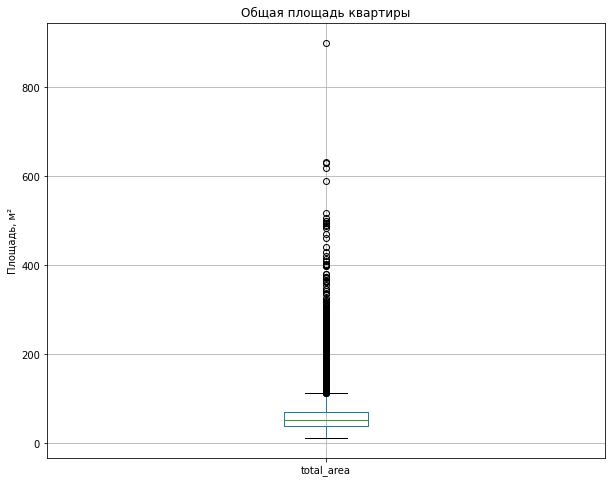

In [33]:
data.boxplot('total_area', figsize=(10,8))
plt.title('Общая площадь квартиры')
plt.ylabel('Площадь, м²')
plt.show()

Мы имеем несоклько точек достаточно удаленных от медианы, среди них самая удаленная - 900 м². Проверим точки больше 400 м².

In [34]:
data.query('total_area > 400')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
660,3,49950000.0,483.90,2017-10-04,7,3.20,6,312.5,4,False,...,26.40,0,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
3117,19,140000000.0,631.00,2019-03-30,7,NaN,5,NaN,5,False,...,60.00,0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
3676,12,28789000.0,441.98,2019-01-23,4,NaN,6,NaN,6,False,...,35.05,0,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,NaN
4237,1,50000000.0,517.00,2017-10-14,7,NaN,4,332.0,3,False,...,22.00,0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
5358,20,65000000.0,590.00,2019-02-14,15,3.50,6,409.0,3,False,...,100.00,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
5893,3,230000000.0,500.00,2017-05-31,6,NaN,7,NaN,7,False,...,40.00,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0
6221,8,34000000.0,470.30,2018-01-14,4,NaN,3,248.7,3,False,...,40.00,0,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,179.0
6621,20,99000000.0,488.00,2017-04-09,5,2.95,20,216.0,17,False,...,50.00,0,Санкт-Петербург,27641.0,4598.0,1.0,646.0,1.0,368.0,351.0
8018,20,84000000.0,507.00,2015-12-17,5,4.45,7,301.5,7,True,...,45.50,1,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0
9826,1,43185328.0,494.10,2017-05-12,1,2.85,12,NaN,3,False,...,NaN,0,Санкт-Петербург,28529.0,6832.0,1.0,592.0,0.0,NaN,5.0


Сравнив цену, жилую площадь и площадь кухни можно допустить такие высокие значения общей площади, поэтому не будем удалять эти значения. А вот минимальное значение в 12 м² можно объяснить продажей доли в квартире, поэтому не будем считать за аномалию. Из-за этого не будем считать за аномалии низкие значения в столбцах `living_area` и `kitchen_area`.

Дальше проверим высоту потолков. Максимальное значение - 100 м. Таких высоких потолков быть не может. Минимальная высота - 1 м, что также является невозможным. Можем предположить, что значения, которые больше 20 м. являются неверными записями вещественных чисел. Проверим сколько таких значений.

In [35]:
data.loc[data['ceiling_height']>20, 'ceiling_height'].count()

22

Разделим эти значения на 10.

In [36]:
data.loc[data['ceiling_height']>=20, 'ceiling_height'] = data['ceiling_height'] / 10

Построим диаграмму размаха, чтобы проанализировать выбросы.

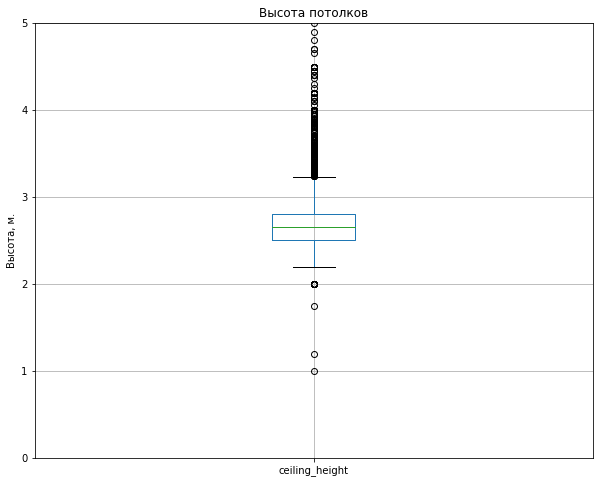

In [37]:
data.boxplot('ceiling_height', figsize=(10,8))
plt.title('Высота потолков')
plt.ylabel('Высота, м.')
plt.ylim(0,5)
plt.show()

Удалим из исходной таблицы строки с высотой потолков меньше 2.2 и больше 3.12.

In [38]:
# помним про пустые значения
data = data.query('2.2 <= ceiling_height <= 3.12 or ceiling_height.isnull()')

Еще раз взглянем на данные.

In [39]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22381.000000,2.238100e+04,22381.000000,22381.000000,13297.000000,22381.000000,20578.000000,22381.000000,20242.000000,22381.000000,16919.000000,16938.000000,16939.000000,7211.000000,16939.000000,8285.000000,19493.000000
mean,9.821813,5.983498e+06,57.784226,2.009696,2.665258,10.938296,32.737035,5.999687,10.271997,0.611054,29039.763107,14700.522612,0.571521,498.047566,0.736761,525.359565,176.595342
std,5.649375,9.125895e+06,30.711413,1.006700,0.165178,6.633646,18.585905,4.940834,5.386118,0.968937,12872.658036,8443.985381,0.771439,346.360484,0.913977,277.334665,215.994687
min,0.000000,1.219000e+04,12.000000,0.000000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,318.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.390000e+06,39.700000,1.000000,2.500000,5.000000,18.300000,2.000000,7.000000,0.000000,18271.000000,10281.500000,0.000000,294.000000,0.000000,303.000000,44.000000
50%,9.000000,4.500000e+06,50.700000,2.000000,2.600000,9.000000,30.000000,4.000000,9.000000,0.000000,27428.000000,13378.000000,0.000000,459.000000,0.000000,509.000000,93.000000
75%,14.000000,6.435720e+06,67.000000,3.000000,2.750000,16.000000,41.000000,8.000000,11.620000,1.000000,37636.000000,16518.000000,1.000000,618.500000,1.000000,736.000000,223.000000
max,50.000000,7.630000e+08,900.000000,19.000000,3.120000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Все остальные данные указаны в пределах разумной нормы и рассматривать их не будем.

**Вывод:** На этапе обработки данных мы успешно заполнили пропущенные значения там где это необходимо. Значения поддающиеся объяснению оставили на месте. Дальше мы удалили неявные дубликаты из столбца `locality_name`. Убрали аномальные значения из столбца `ceiling_height`. В результате этих преобразований были удалены 1318 строк, что составляет 5.6% от первоначальных данных. Дополнительно у некоторых столбцов поменяли тип данных и привели названия к хорошему стилю.

#### Добавление новых стобцов

**Цена одного квадратного метра.**

In [40]:
# для этого поделим `last_price` на `total_area`. 
data['price_one_meter'] = data['last_price'] / data['total_area']

**День публикации объявления (0 - понедельник, 1 - вторник и т.д.).**

In [41]:
data['weekday_exposition'] = data['first_day_exposition'].dt.dayofweek

**Месяц публикации объявления.**

In [42]:
data['month_exposition'] = data['first_day_exposition'].dt.month

**Год публикации объявления.**

In [43]:
data['year_exposition'] = data['first_day_exposition'].dt.year

**Тип этажа квартиры (значения — «первый», «последний», «другой»)** Создадим функцию и применим её к нашему набору данных.

In [44]:
# функция будет принимать строку датафрема
def type_of_floor_func(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

# применим к нашему фрейму данных
data['type_floor'] = data.apply(type_of_floor_func, axis=1)

**Расстояние в км до центра города.**

In [45]:
data['km_city_center'] = (data['city_centers_nearest'] / 1000).round()

Проверим новые столбцы.

In [46]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday_exposition,month_exposition,year_exposition,type_floor,km_city_center
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой,15.0


**Вывод:** Добавили новые стобцы с ценой за 1 м², км. от центра города, тип этажа квартиры, день недели, месяц и год публикации объявления. В процессе помимо стандартных методов библиотеки `pandas` использовали созданную функцию `type_of_floor_func`, которая возвращает для каждой строки тип этажа.

### Проведите исследовательский анализ данных

#### Изучим параметры квартир

##### Общая площадь

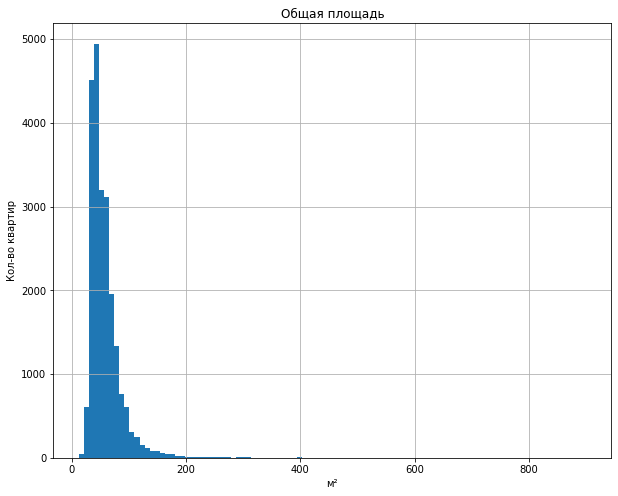

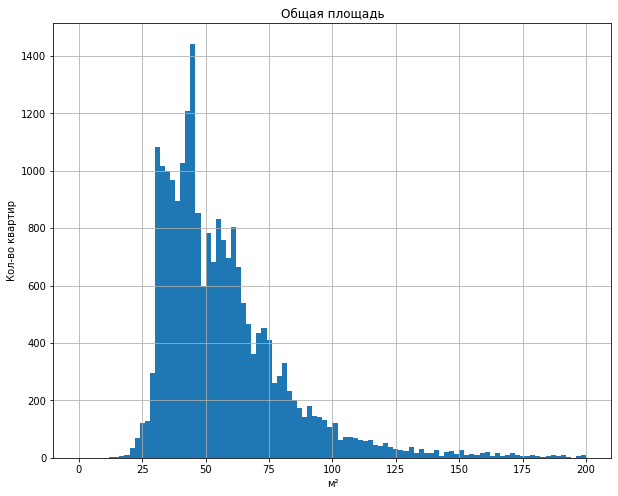

count    22381.000000
mean        57.784226
std         30.711413
min         12.000000
25%         39.700000
50%         50.700000
75%         67.000000
max        900.000000
Name: total_area, dtype: float64

In [47]:
# общий график
data['total_area'].hist(bins=100, figsize=(10,8))
plt.title('Общая площадь')
plt.xlabel('м²')
plt.ylabel('Кол-во квартир')
plt.show()

# в диапазоне от 0 до 200
data['total_area'].hist(bins=100, figsize=(10,8), range=(0,200))
plt.title('Общая площадь')
plt.xlabel('м²')
plt.ylabel('Кол-во квартир')
plt.show()

# описание данных
data['total_area'].describe()

Большая часть значений сосредоточена в диапазоне от 25 до 100 м². Пик в диапазоне (40, 50). Дальше идет медленный спад и после 200 м² объявления встречаются крайне редко, что объясняется редкостью таких квартир, но эти значения смещают среднее в большую сторону.

##### Жилая площадь

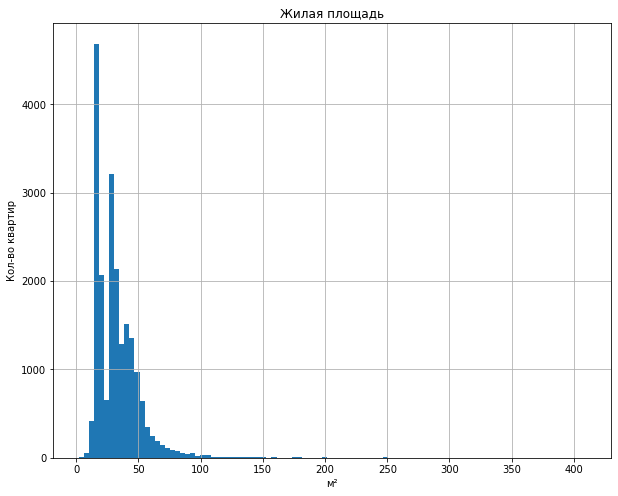

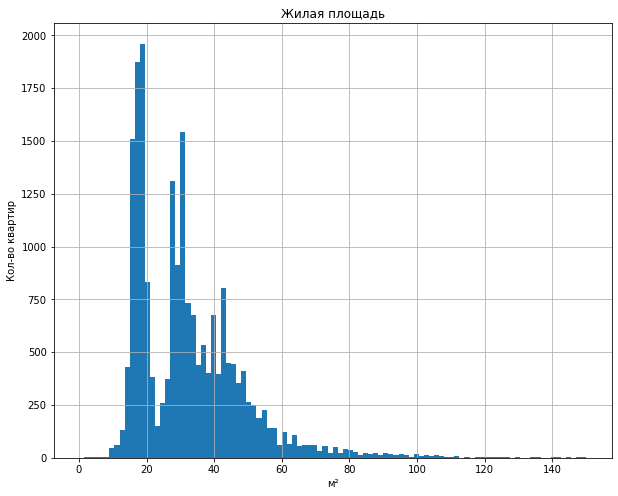

count    20578.000000
mean        32.737035
std         18.585905
min          2.000000
25%         18.300000
50%         30.000000
75%         41.000000
max        409.700000
Name: living_area, dtype: float64

In [48]:
# общий график
data['living_area'].hist(bins=100, figsize=(10,8))
plt.title('Жилая площадь')
plt.xlabel('м²')
plt.ylabel('Кол-во квартир')
plt.show()

# в диапазоне от 0 до 150
data['living_area'].hist(bins=100, figsize=(10,8), range=(0,150))
plt.title('Жилая площадь')
plt.xlabel('м²')
plt.ylabel('Кол-во квартир')
plt.show()

# описание данных
data['living_area'].describe()

Большая часть значений сосредоточена в диапазоне от 15 до 80 м². Примечательны два пика в диапазонах (15, 20) и (25,30). Это значит, что варианты планировки квартир c такими параметрами более популярны. Среднее смещено вправо из-за наличия больших значений.

##### Площадь кухни

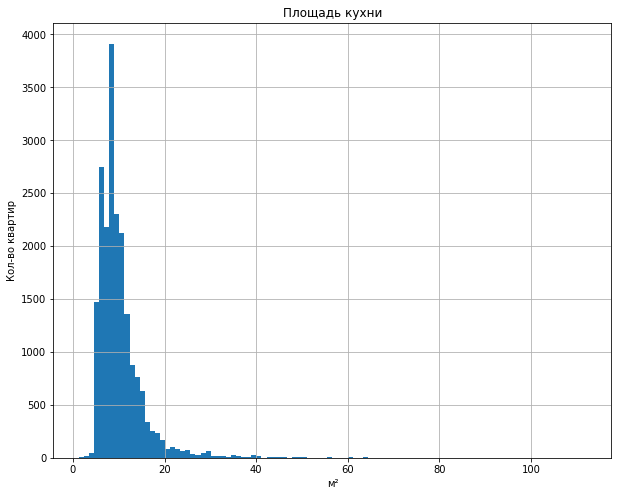

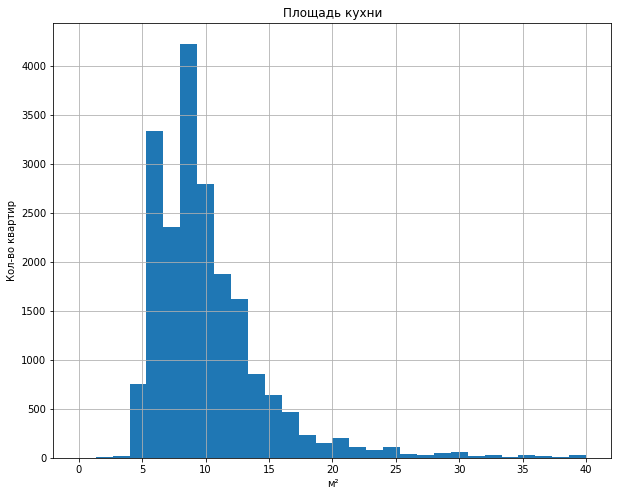

count    20242.000000
mean        10.271997
std          5.386118
min          1.300000
25%          7.000000
50%          9.000000
75%         11.620000
max        112.000000
Name: kitchen_area, dtype: float64

In [49]:
# общий график
data['kitchen_area'].hist(bins=100, figsize=(10,8))
plt.title('Площадь кухни')
plt.xlabel('м²')
plt.ylabel('Кол-во квартир')
plt.show()

# в диапазоне от 0 до 40
data['kitchen_area'].hist(bins=30, figsize=(10,8), range=(0,40))
plt.title('Площадь кухни')
plt.xlabel('м²')
plt.ylabel('Кол-во квартир')
plt.show()

# описание данных
data['kitchen_area'].describe()

Большая часть значений сосредоточена в диапазоне от 4 до 20 м². Пик находится в диапазоне (5, 8). Среднее смещено вправо из-за наличия больших значений.

##### Цена объекта

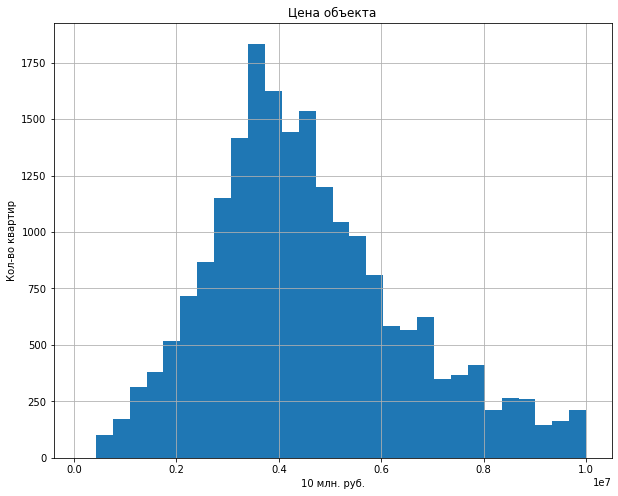

count    2.238100e+04
mean     5.983498e+06
std      9.125895e+06
min      1.219000e+04
25%      3.390000e+06
50%      4.500000e+06
75%      6.435720e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [50]:
# сразу установим диапазон от 100 000 до 10 000 000
data['last_price'].hist(bins=30, figsize=(10,8), range=(1.0e+5, 1.0e+7))
plt.title('Цена объекта')
plt.xlabel('10 млн. руб.')
plt.ylabel('Кол-во квартир')
plt.show()

# описание данных
data['last_price'].describe()

Большая часть значений сосредоточена в диапазоне от 1 до 8 млн руб. Пик находится в диапазоне от 3 до 4 млн. руб. Среднее смещено вправо из-за наличия больших значений.

##### Количество комнат

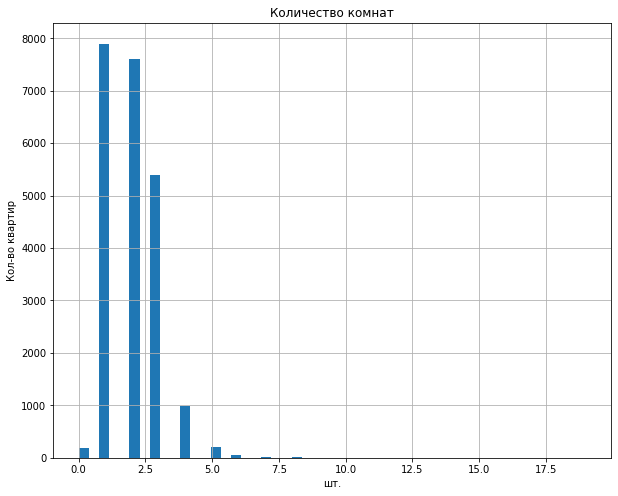

count    22381.000000
mean         2.009696
std          1.006700
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [51]:
# общий график
data['rooms'].hist(bins=50, figsize=(10,8))
plt.title('Количество комнат')
plt.xlabel('шт.')
plt.ylabel('Кол-во квартир')
plt.show()

# описание данных
data['rooms'].describe()

Самые популярные квартиры имеют 1 или 2 комнаты. Не сильно отстают и 3-х комнатные квартиры. Видим что квартиры более 5-ти комнат крайне редки.

##### Высота потолков

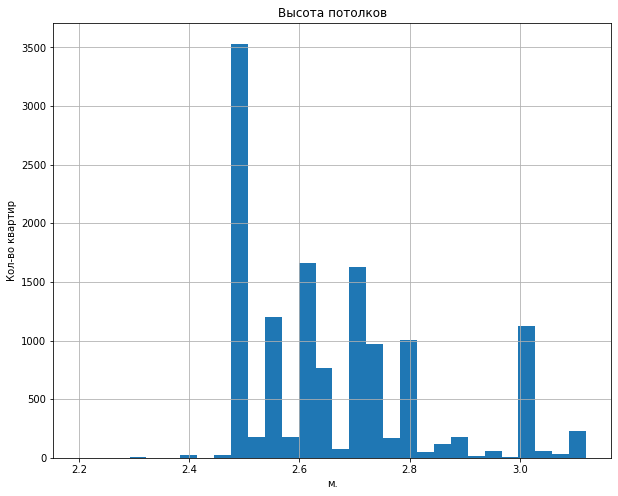

count    13297.000000
mean         2.665258
std          0.165178
min          2.200000
25%          2.500000
50%          2.600000
75%          2.750000
max          3.120000
Name: ceiling_height, dtype: float64

In [52]:
# общий график
data['ceiling_height'].hist(bins=30, figsize=(10,8))
plt.title('Высота потолков')
plt.xlabel('м.')
plt.ylabel('Кол-во квартир')
plt.show()

# описание данных
data['ceiling_height'].describe()

Основные значения сосредоточены в промежутке от 2.45 до 3 м. Самая популярная высота потолков составляет от 2.50 до 2.55 м.

##### Этаж квартиры

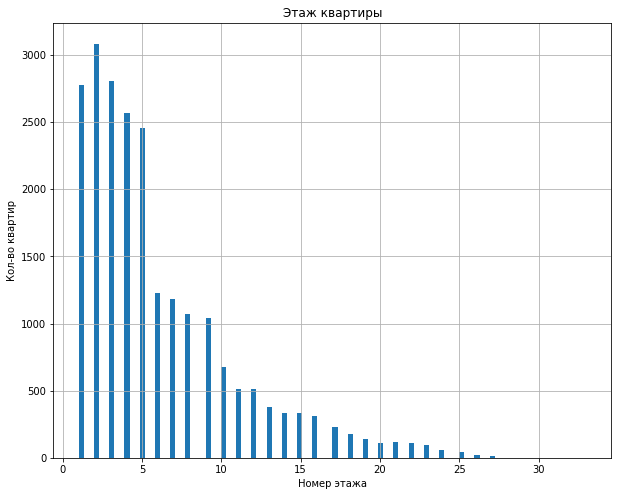

count    22381.000000
mean         5.999687
std          4.940834
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [53]:
# общий график
data['floor'].hist(bins=100, figsize=(10,8))
plt.title('Этаж квартиры')
plt.xlabel('Номер этажа')
plt.ylabel('Кол-во квартир')
plt.show()

# описание данных
data['floor'].describe()

Основная масса значений приходится на диапазон от 1 до 10 этажей. Больше всего квартир находится в пределах от 1 до 5 этажей. Дальше идет резкий спад.

##### Тип этажа квартиры

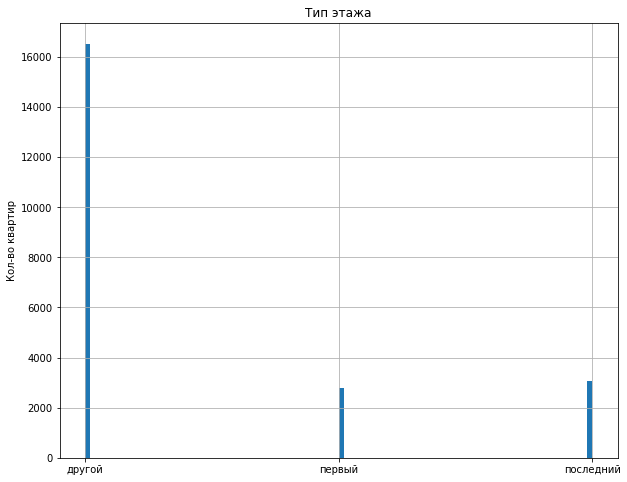

count      22381
unique         3
top       другой
freq       16529
Name: type_floor, dtype: object

In [54]:
# общий график
data['type_floor'].hist(bins=100, figsize=(10,8))
plt.title('Тип этажа')
plt.ylabel('Кол-во квартир')
plt.show()

# описание данных
data['type_floor'].describe()

Наибольшее предложение имеют квартиры не на первом и не на последнем этаже. Это очевидно, т.к. таких квартир больше. Всех меньше объявлений о продаже квартир находящихся на первом этаже.

##### Общее количество этажей в доме

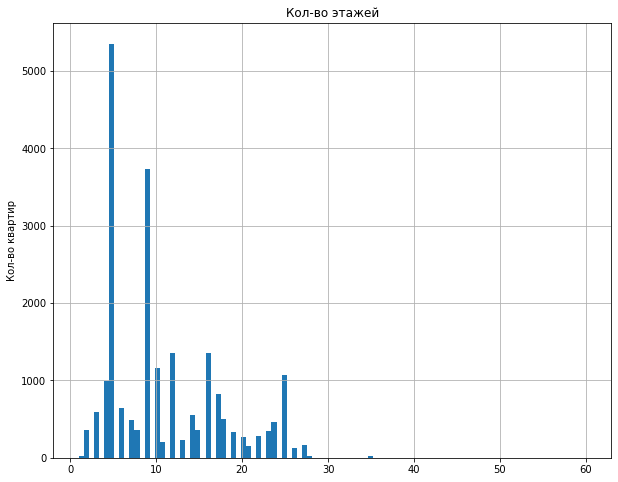

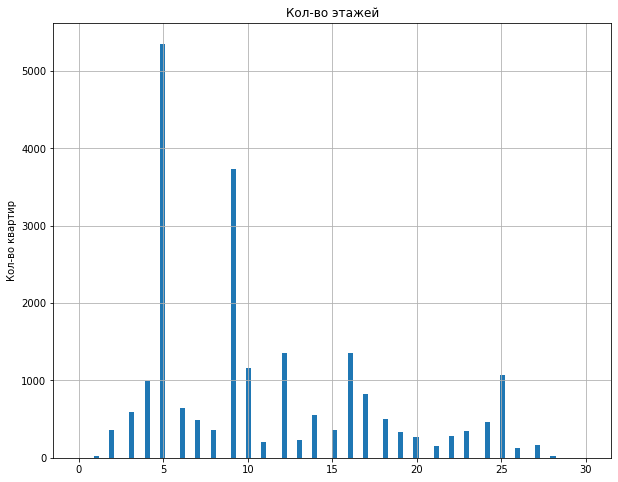

count    22381.000000
mean        10.938296
std          6.633646
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [55]:
# общий график
data['floors_total'].hist(bins=100, figsize=(10,8))
plt.title('Кол-во этажей')
plt.ylabel('Кол-во квартир')
plt.show()

# в диапазоне от 0 до 30
data['floors_total'].hist(bins=100, figsize=(10,8), range=(0,30))
plt.title('Кол-во этажей')
plt.ylabel('Кол-во квартир')
plt.show()

# описание данных
data['floors_total'].describe()

Наиболее популяярны квартиры в 5-ти и 9-ти этажных домах. Что примечательно, это стандартные дома, которые были массово построены во времена СССР.

##### Расстояние до центра города в метрах

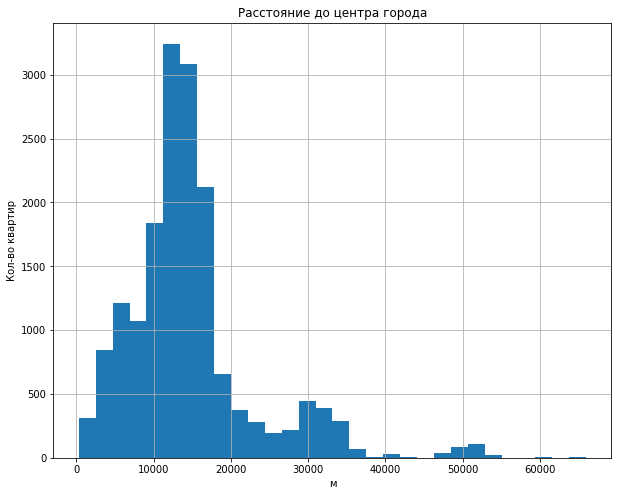

count    16938.000000
mean     14700.522612
std       8443.985381
min        318.000000
25%      10281.500000
50%      13378.000000
75%      16518.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [56]:
# общий график
data['city_centers_nearest'].hist(bins=30, figsize=(10,8))
plt.title('Расстояние до центра города')
plt.xlabel('м')
plt.ylabel('Кол-во квартир')
plt.show()

# описание данных
data['city_centers_nearest'].describe()

Большая часть объявлений с квартирами на расстоянии от 10 до 20 км от центра города. На расстоянии до 10 км продается достаточно квартир. Квартир на расстоянии более 45 км становится очень мало.

##### Расстояние до ближайшего аэропорта

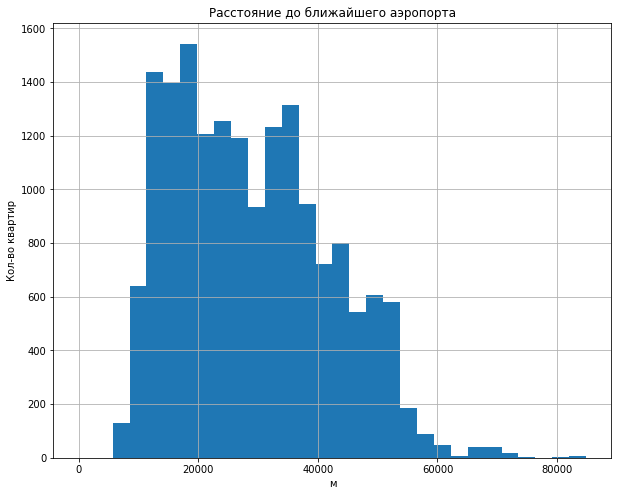

count    16919.000000
mean     29039.763107
std      12872.658036
min          0.000000
25%      18271.000000
50%      27428.000000
75%      37636.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [57]:
# общий график
data['airports_nearest'].hist(bins=30, figsize=(10,8))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('м')
plt.ylabel('Кол-во квартир')
plt.show()

# описание данных
data['airports_nearest'].describe()

Большая часть объявлений с квартирами на расстоянии от 15 до 55 км. от аэропорта. Других квартир очень мало.

##### Расстояние до ближайшего парка

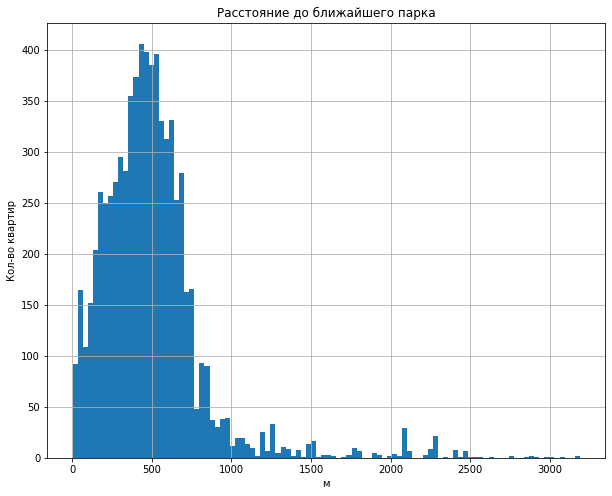

count    7211.000000
mean      498.047566
std       346.360484
min         1.000000
25%       294.000000
50%       459.000000
75%       618.500000
max      3190.000000
Name: parks_nearest, dtype: float64

In [58]:
# общий график
data['parks_nearest'].hist(bins=100, figsize=(10,8))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('м')
plt.ylabel('Кол-во квартир')
plt.show()

# описание данных
data['parks_nearest'].describe()

Большая часть квартир находится на расстоянии до 750 м от парка. Другие значения редки.

##### День и месяц публикации объявления

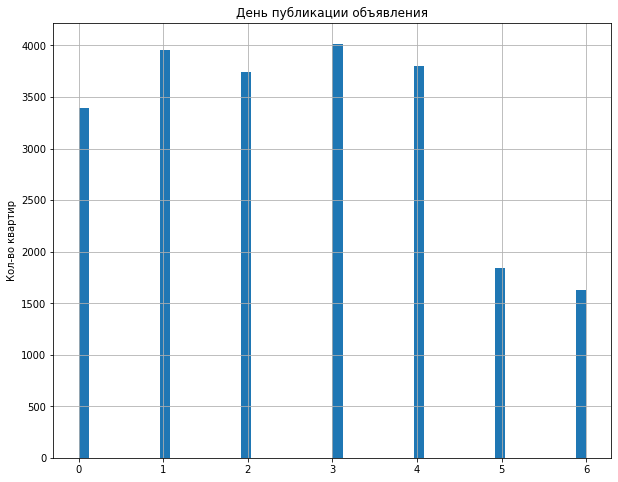

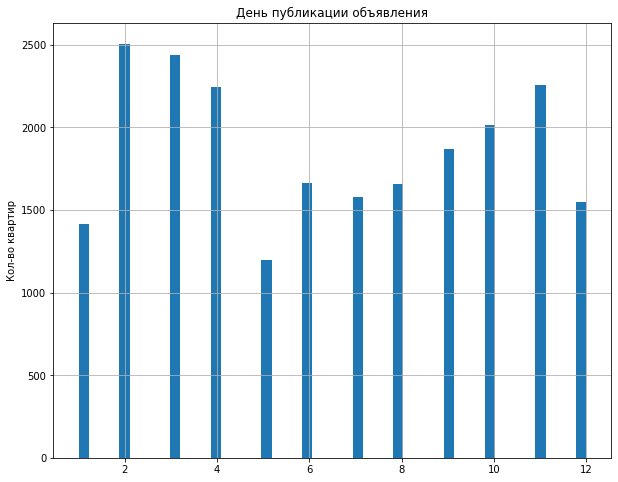

,weekday_exposition,month_exposition
count,22381.000000,22381.000000
mean,2.576158,6.402931
std,1.792889,3.494464
min,0.000000,1.000000
25%,1.000000,3.000000
50%,3.000000,6.000000
75%,4.000000,10.000000
max,6.000000,12.000000


In [59]:
# график "день публикации"
data['weekday_exposition'].hist(bins=50, figsize=(10,8))
plt.title('День публикации объявления')
plt.ylabel('Кол-во квартир')
plt.show()

#график "месяц публикации"
data['month_exposition'].hist(bins=50, figsize=(10,8))
plt.title('День публикации объявления')
plt.ylabel('Кол-во квартир')
plt.show()
# описание данных
data[['weekday_exposition', 'month_exposition']].describe()

Меньше всего объявлений выкладывают в выходные дни, а больше всего во вторник и четверг.
Если смотреть в разрезе месяцев, то меньше всего выкладывают объявления в декабре, январе и мае, а больше всего в феврале, марте, апреле и ноябре.

#### Как быстро продавались квартиры

Изучим как быстро продавались кватиры. Для этого рассмотри столбец `days_exposition`.

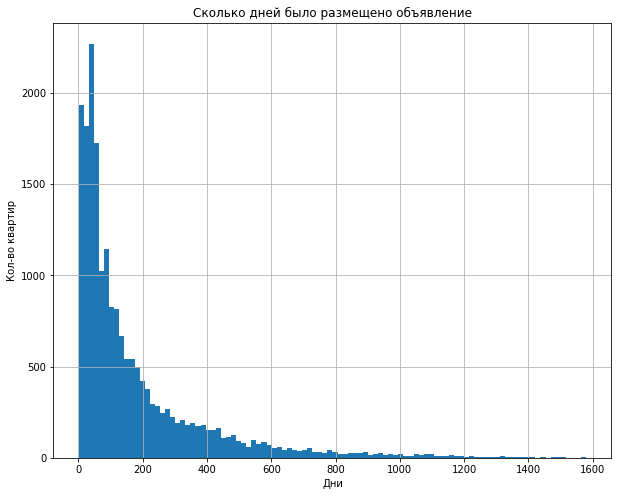

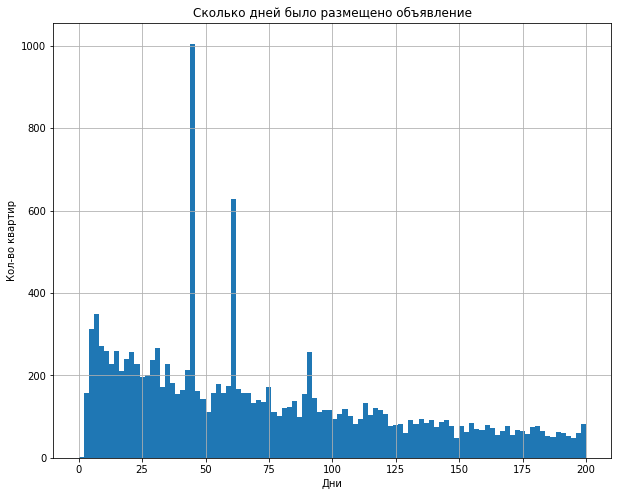

count    19493.000000
mean       176.595342
std        215.994687
min          1.000000
25%         44.000000
50%         93.000000
75%        223.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [60]:
# общий график
data['days_exposition'].hist(bins=100, figsize=(10,8))
plt.title('Сколько дней было размещено объявление')
plt.xlabel('Дни')
plt.ylabel('Кол-во квартир')
plt.show()

data['days_exposition'].hist(bins=100, figsize=(10,8), range=(0,200))
plt.title('Сколько дней было размещено объявление')
plt.xlabel('Дни')
plt.ylabel('Кол-во квартир')
plt.show()

# описание данных
data['days_exposition'].describe()

По графику видно, что объявления могут закрываться на протяжении длительного времени (больше года). Это может быть связано с тем, что люди забывают удалить объявление после продажи квартиры. Также примечательны два пика на 45-й и 60-й день с момента размещения объявления. 

Среднее - 176.59
Медиана - 93

Из-за слишком большого хвоста на графике, среднее отклоняется в большую сторону от медианы.
Подразумеваем что в данных находятся много выбросов. Построим диграмму размаха и изучим данные без выбросов.

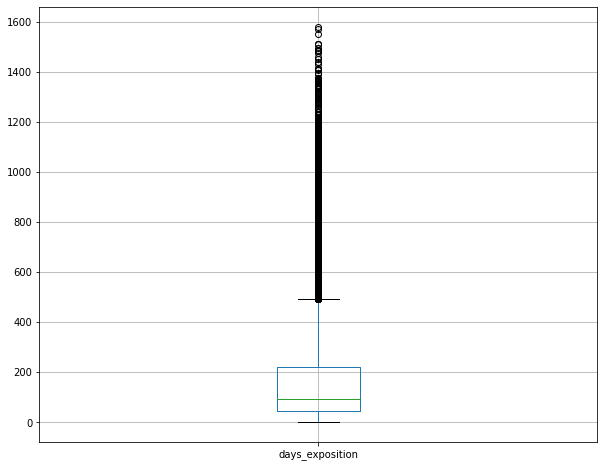

In [61]:
data.boxplot('days_exposition', figsize=(10,8))
plt.show()

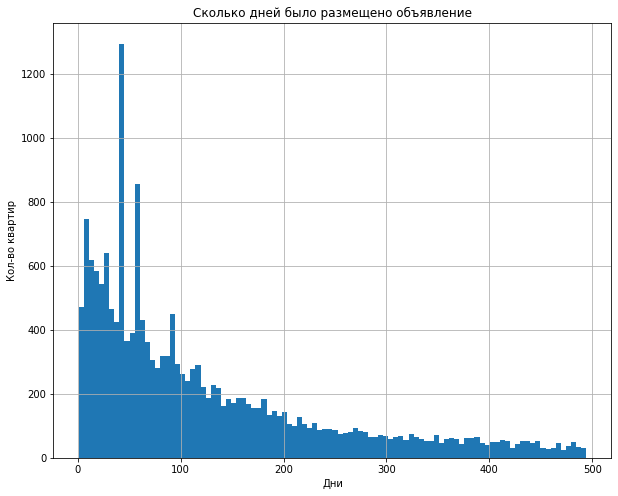

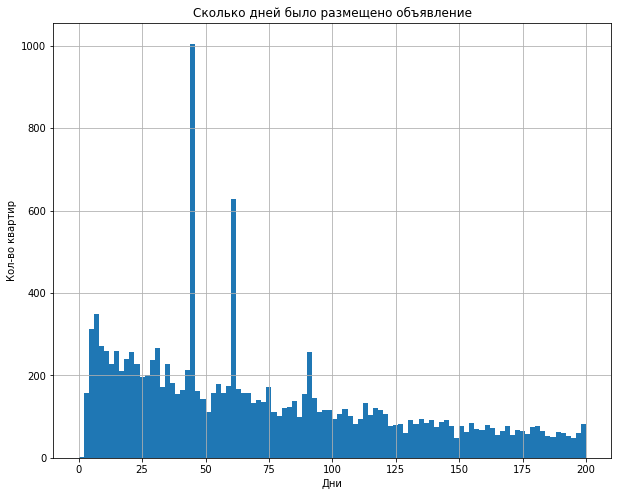

count    17881.000000
mean       124.692411
std        117.403636
min          1.000000
25%         40.000000
50%         82.000000
75%        178.000000
max        494.000000
Name: days_exposition, dtype: float64

In [62]:
data_new = data.query('days_exposition < 495')

# общий график
data_new['days_exposition'].hist(bins=100, figsize=(10,8))
plt.title('Сколько дней было размещено объявление')
plt.xlabel('Дни')
plt.ylabel('Кол-во квартир')
plt.show()

# график с данными от 0 до 200 дней
data_new['days_exposition'].hist(bins=100, figsize=(10,8), range=(0,200))
plt.title('Сколько дней было размещено объявление')
plt.xlabel('Дни')
plt.ylabel('Кол-во квартир')
plt.show()

# описание данных
data_new['days_exposition'].describe()

**Вывод:** От 0 до 40 дней можно считать как быстрые продажи, от 178 до 494 долгими. Выше 495 значения являются выбросами и вероятнее всего являются неудаленными объявлениями.

#### Зависимость стоимости объекта

Проверим зависимость стоимости объектов от следующих параметров:
- общей площади;
- жилой площади;
- площади кухни;
- количество комнат;
- типа этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год);

Построим матрицу корреляций и графики к вышеперечисленным параметрам, за исключением дня недели, месяца и года, т.к. у них определенно нет линейной связи со стоимость квартиры. Позже рассмотрим эти зависимости на графиках.

In [63]:
# матрица корреляций
data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.628107,0.536201,0.515521,0.340386
total_area,0.628107,1.000000,0.927680,0.597684,0.748840
living_area,0.536201,0.927680,1.000000,0.386863,0.852340
kitchen_area,0.515521,0.597684,0.386863,1.000000,0.223104
rooms,0.340386,0.748840,0.852340,0.223104,1.000000


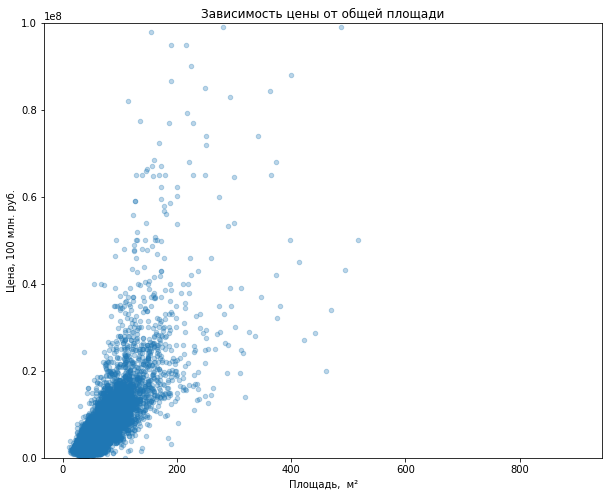

In [64]:
# график зависимости цены от общей площади
data.plot(x='total_area', y='last_price', kind='scatter', figsize=(10,8), alpha=0.3)
plt.title('Зависимость цены от общей площади')
plt.xlabel('Площадь,  м²')
plt.ylabel('Цена, 100 млн. руб.')
plt.ylim(0, 1.0e+8)
plt.show()

Связь между ценой и общей площадью квартиры есть, но не сильная. Можно увидеть положительную связь у квартир с площадью до 200 м² и стоимостью до 200 млн. руб., при значениях выше, связь исчезает.

**Вывод:** Площадь квартиры является важным (даже самым важным из рассматриваемых), но не определяющим фактором при определении стоимости квартиры.

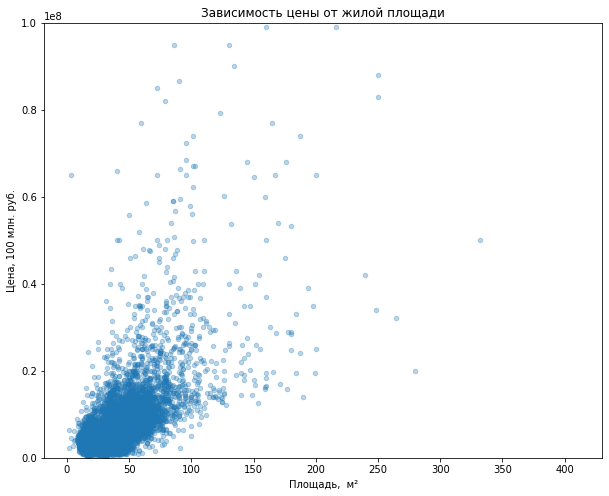

In [65]:
# график зависимости цены от жилой площади
data.plot(x='living_area', y='last_price', kind='scatter', figsize=(10,8), alpha=0.3)
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Площадь,  м²')
plt.ylabel('Цена, 100 млн. руб.')
plt.ylim(0, 1.0e+8)
plt.show()

Имеется не сильная связь между ценой и жилой площадью квартиры. Можно увидеть положительную связь у квартир с площадью до 80 м² и стоимостью до 150 млн. руб., при значениях выше, связь исчезает.

**Вывод:** Положительная связь между жилой площадью квартиры и ценой есть, но она слабее чем в случае с общей площадью.

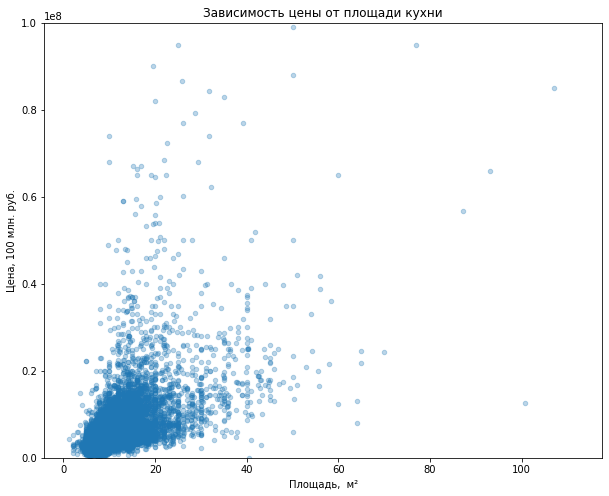

In [66]:
# график зависимости цены от площади кухни
data.plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(10,8), alpha=0.3)
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь,  м²')
plt.ylabel('Цена, 100 млн. руб.')
plt.ylim(0, 1.0e+8)
plt.show()

Имеется не сильная связь между ценой и площадью кухни. Можно увидеть положительную связь у квартир с площадью кухни до 25 м² и стоимостью до 200 млн. руб., при значениях выше, связь исчезает.

**Вывод:** Положительная связь между площадью кухни и ценой есть, но она слабее чем в предыдущих случаях.

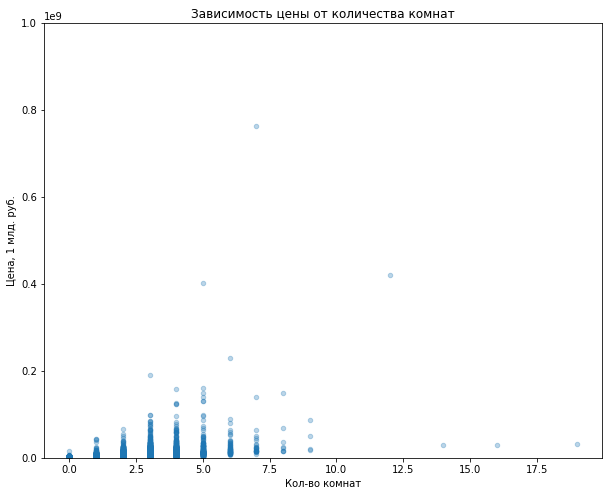

In [67]:
# график зависимости цены от количества комнат
data.plot(x='rooms', y='last_price', kind='scatter', figsize=(10,8), alpha=0.3)
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Кол-во комнат')
plt.ylabel('Цена, 1 млд. руб.')
plt.ylim(0, 1.0e+9)
plt.show()

Хоть мы и можем увидеть положительную корреляцию, данный график не слишком информативен и понятен.
Создадим сводную таблицу, и на её основе построим линейный график. Аггрегируем данные по медиане, чтобы минимизировать влияние выбросов.

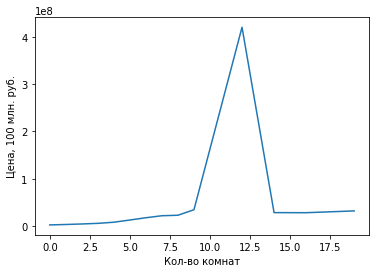

In [68]:
data.pivot_table(index='rooms', values='last_price', aggfunc=['median']).plot(legend=False)
plt.xlabel('Кол-во комнат')
plt.ylabel('Цена, 100 млн. руб.')
plt.show()

Видим необычный пик. Проверим стобец `rooms` на выбросы. Построим диаграмму размаха.

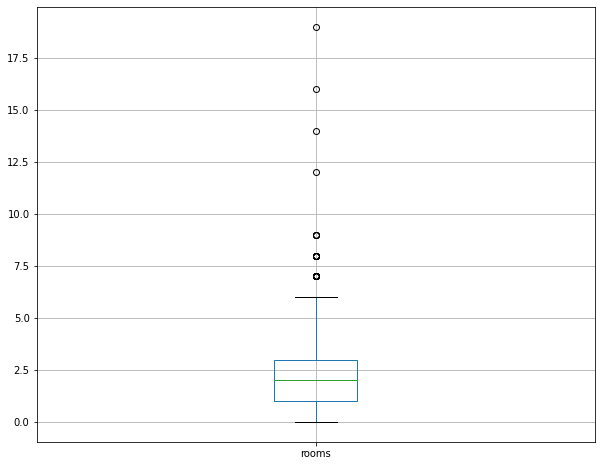

In [69]:
data.boxplot('rooms', figsize=(10,8))
plt.show()

Значения выше 6 являются выбросами. Создадим новый набор данных без этих значений и повторим анализ.

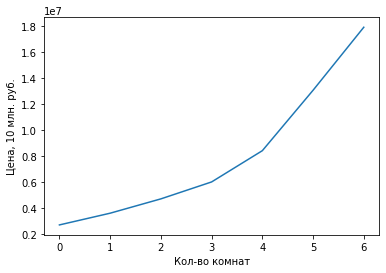

In [70]:
data_new1 = data.query('rooms <= 6')

data_new1.pivot_table(index='rooms', values='last_price', aggfunc=['median']).plot(legend=False)
plt.xlabel('Кол-во комнат')
plt.ylabel('Цена, 10 млн. руб.')
plt.show()

**Вывод:** Анализируя график и коэфф. корреляции выдим что цена имеет прямую зависимость от количества комнат, хоть связь и слабее чем у площади квартиры.

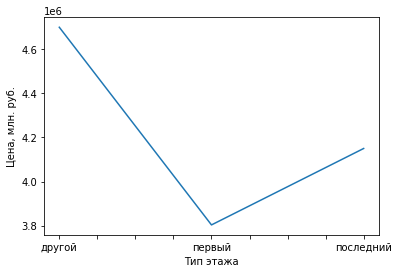

In [71]:
# график зависимости цены квартиры от типа этажа
data.pivot_table(index='type_floor', values='last_price', aggfunc=['median']).plot(legend=False)
plt.xlabel('Тип этажа')
plt.ylabel('Цена, млн. руб.')
plt.show()

**Вывод:** Квартиры на первом этаже стоят определенно дешевле чем на остальных. Квартиры не на первом и не на последнем этаже стоят дороже всего.

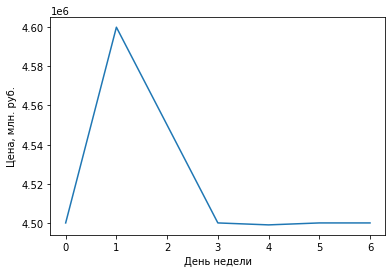

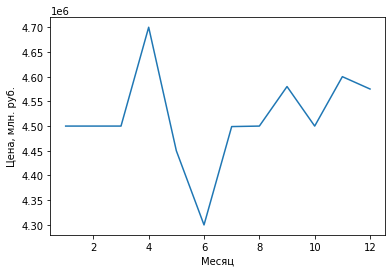

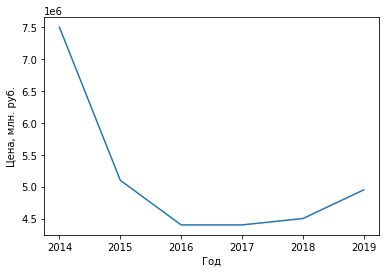

In [72]:
# график зависимости цены квартиры от дня недели
data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median').plot(legend=False)
plt.xlabel('День недели')
plt.ylabel('Цена, млн. руб.')
plt.show()

# график зависимости цены квартиры от месяца
data.pivot_table(index='month_exposition', values='last_price', aggfunc='median').plot(legend=False)
plt.xlabel('Месяц')
plt.ylabel('Цена, млн. руб.')
plt.show()

# график зависимости цены квартиры от года
data.pivot_table(index='year_exposition', values='last_price', aggfunc='median').plot(legend=False)
plt.xlabel('Год')
plt.ylabel('Цена, млн. руб.')
plt.show()

**Вывод:** По графикам видно, что цена не имеет никакой связи ни с днем недели, ни с месяцем размещения объявления. Связь с годом отрицательна, но очень близка к нулю.

**В итоге:** Больше всего на цену квартиры влияет площадь квартиры, площадь жилой площади, площадь кухни, кол-во комнат. Не влияет на цену - дата публикации объявления. Так-же примечательно, что квартиры на первом этаже стоят дешевле чем на других.

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Выделим топ 10 населенных пунктов с набольшим числом объявлений.

In [73]:
# группируем по городам, считаем строки, сортируем по убыванию, берем индексы топ 10 значений
locality_10 = data['locality_name'].value_counts().head(10)
locality_10

Санкт-Петербург      14569
поселок Мурино         552
Кудрово                469
поселок Шушары         438
Всеволожск             394
Пушкин                 353
Колпино                330
поселок Парголово      327
Гатчина                304
Выборг                 222
Name: locality_name, dtype: int64

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Рейтинг топ-10 получен 

Для каждого этого города посчитаем среднюю цену 1 м² и изобразим столбчатую диаграмму по этим значениям.

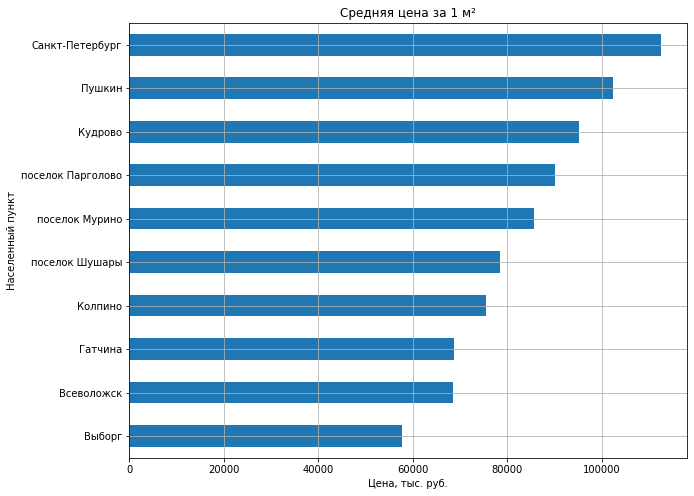

,price_one_meter
locality_name,
Выборг,57800.848936
Всеволожск,68608.881109
Гатчина,68665.848788
Колпино,75514.267490
поселок Шушары,78528.744875
поселок Мурино,85629.568678
поселок Парголово,90175.913458
Кудрово,95261.963450
Пушкин,102399.815938


In [74]:
(data.query('locality_name in @locality_10.index')
.pivot_table(index='locality_name', values='price_one_meter', aggfunc='mean').sort_values('price_one_meter')
.plot(kind='barh', legend=False, grid=True, figsize=(10,8)))
plt.title('Средняя цена за 1 м²')
plt.xlabel('Цена, тыс. руб.')
plt.ylabel('Населенный пункт')
plt.show()

data.query('locality_name in @locality_10.index').pivot_table(index='locality_name',
                              values='price_one_meter', aggfunc='mean').sort_values('price_one_meter')

**Вывод:** Наиболее высокая цена в Санкт-Петербурге (112496.37), далее идет Пушкин (102399.82) и Кудрово (95261.96). Наиболее низкая в Выборге (57800.85), Всеволожске (68608.88) и Гатчине (68665.85)

#### Выделите квартиры в Санкт-Петербурге  и вычислите среднюю цену каждого километра до центра города. Опишите, как стоимость объектов зависит от расстояния до центра города

Создадим новый набор данных с город Санкт-Петербург и сделаем свод со средней ценой за 1 м² по каждому километру.

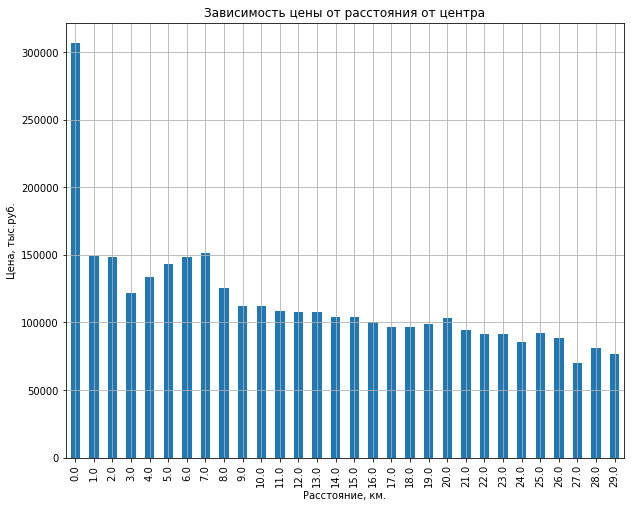

,price_one_meter
km_city_center,
0.0,306618.566790
1.0,149423.182711
2.0,148540.854026
3.0,121748.625782
4.0,133429.040947
5.0,143312.329384
6.0,148200.309756
7.0,151690.731963
8.0,125160.639584


In [75]:
(data[data['locality_name'] == 'Санкт-Петербург']
.pivot_table(index='km_city_center',values='price_one_meter', aggfunc='mean')
.plot(kind='bar',legend=False, grid=True, figsize=(10,8)))
plt.title('Зависимость цены от расстояния от центра')
plt.xlabel('Расстояние, км.')
plt.ylabel('Цена, тыс.руб.')
plt.show()

data[data['locality_name'] == 'Санкт-Петербург'].pivot_table(index='km_city_center',values='price_one_meter', aggfunc='mean')

**Вывод:** Самая большая цена имеется у квартир находящихся в самом центре города (306618.57). эта позиция находится в наибольшем отрыве от остальных и превышает следующую позицию - 1 км. в два раза (149423.18). Дальше с увеличением расстояния, значения цены в целом идут на спад. Минимальная цена за 1 м² у квартир находящихся на расстоянии 27 км. от центра города (70312.50).

### Общий вывод

В данном проекте мы провели следующие операции над данными:
- привели заголовок `cityCenters_nearest` к хорошему стилю `city_centers_nearest`
- заполнили пропущенные значения в полях `is_apartment` и `balcony`
- удалили строки с незаполненными этажами и населенными пунктами
- изменили типы данных в столбцах `first_day_exposition`, `floors_total`, `balcony`
- удалили дубликаты в столбце `locality_name`
- удалили аномальные значения в столбце `ceiling_height`
- добавили новые стобцы: цена за 1 м², км. от центра города, тип этажа квартиры, день недели, месяц и год публикации объявления

После обработки мы приступили к исследованию, в котором с помощью построения графиков изучали и описывали поля таблицы. Также была проанализирована взаимосвязь между полями, и в результате мы можем сделать следующие выводы:
- Продажи совершенные в первые 40 дней с момента размещения объявления считаются быстрыми, от 178 до 494 дней долгими. Если объявление висит более 495 дней и более, значит, вероятнее всего, его забыли удалить и оно не актуально.
- Больше всего на стоимость квартиры влияет площадь квартиры, комнат и кухни, количество комнат. Меньше всего влияет дата размещения объявления.
- Стоимость квартир на первом этаже обычно сильно ниже чем на остальных.
- Самые высокие цены за 1 м² у следующих населенных пунктов:
    - Санкт-Петербург	112496.37
    - Пушкин	102399.82
    - Кудрово	95261.96
  
  Самые низкие:
    - Выборг	57800.85
    - Всеволожск	68608.88
    - Гатчина	68665.85
- Цена за 1 м² в Санкт-Петербурге изменяется обратно-пропорционально расстоянию от центра города. Причем цена за 1 м² в самом центре города более чем в два раза больше чем на расстоянии 1 км. от него. 

Рекомендации для построения автоматизированной системы:
- Особое внимание уделить на поиск аномальных значений в высоте потолков, т.к. в нем были обнаружены абсолютно нелогичные значения.
- Объявления с незаполенным населенным пунктом считать за ошибочное, т.к. это одно из самых важных полей для поиска квартиры.
- Система должна уметь определять населенный пункт как с указанием типа н.п., так и без него.
- Объявления провисевшие более 495 дней должны считаться аномальными и запрашивать у продавца дополнительного подтверждения или сразу удаляться.